In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn

import theanets

%matplotlib inline

In [2]:
mnist = np.loadtxt("../data/mnist_train.csv", delimiter=",", skiprows=1, dtype=int)

In [41]:
X = mnist[:, 1:] / 255.0
y = mnist[:, 0].astype(np.uint8)

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25)

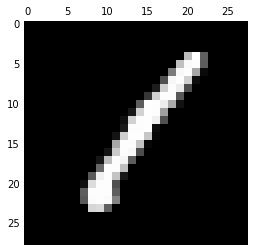

In [42]:
plt.matshow(X[0, :].reshape(28, 28), cmap=plt.cm.gray)

In [54]:
hidden = 10
simple_net = theanets.Classifier(layers=[28 * 28, hidden * hidden, 10])

In [55]:
simple_net.train(
    (X_train, y_train),
    (X_validation, y_validation),
    algo='nag',
    learning_rate=1e-3,
    momentum=0.9
)

(OrderedDict([('loss', 0.014738821342456443), ('err', 0.014738821342456443), ('acc', 0.99888959390862941)]),
 OrderedDict([('loss', 0.11632189504310306), ('err', 0.11632189504310306), ('acc', 0.96696768060836502)]))

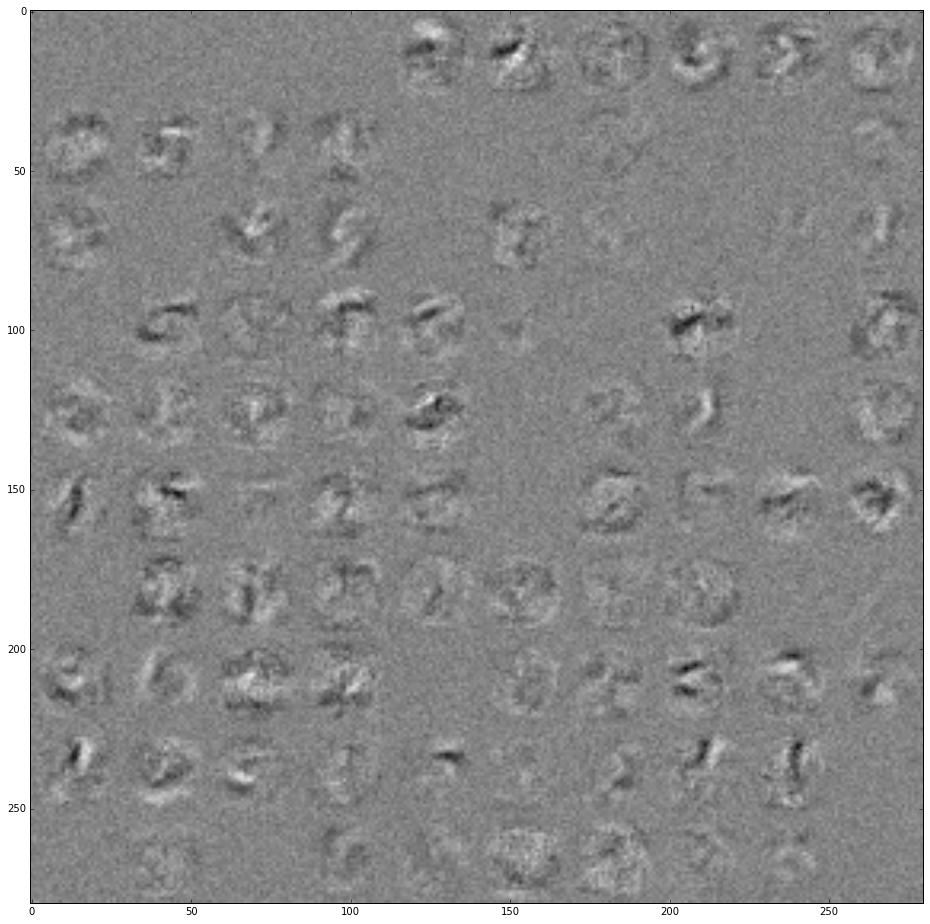

In [56]:
plt.figure(figsize=(16, 16))

img = np.zeros((28 * hidden, 28 * hidden), dtype='f')
for i, pix in enumerate(simple_net.find('hid1', 'w').get_value().T):
    r, c = divmod(i, hidden)
    img[r * 28:(r+1) * 28, c * 28:(c+1) * 28] = pix.reshape((28, 28))
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [57]:
y_predicted = simple_net.classify(X_test)

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix

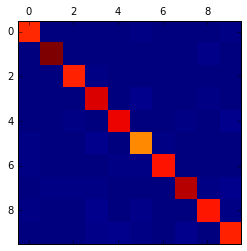

In [59]:
cm = confusion_matrix(y_predicted, y_test)

plt.matshow(cm)

In [53]:
accuracy_score(y_predicted, y_test)

0.94773809523809527